In [1]:
%pylab inline
from topic_reranking import *
from constants import DATASETS
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 100)

Populating the interactive namespace from numpy and matplotlib


In [2]:
topn = 20
metrics = ['u_mass', 'c_v', 'c_uci', 'c_npmi', 'vote']
save=True
param_ids = ['a42', 'b42', 'c42', 'd42', 'e42']
nbs_topics = [10, 25, 50, 100]

------

In [66]:
dewa = Reranker.load_topics_and_scores(DATASETS['dewa'], joined=True)
e = Reranker.load_topics_and_scores(DATASETS['E'], joined=True)
fa = Reranker.load_topics_and_scores(DATASETS['FA'], joined=True)
fo = Reranker.load_topics_and_scores(DATASETS['FO'], joined=True)
o = Reranker.load_topics_and_scores(DATASETS['O'], joined=True)
p = Reranker.load_topics_and_scores(DATASETS['P'], joined=True)
df = pd.concat([dewa, e, fa, fo, o, p])

Loading ../data/preprocessed/LDAmodel/Reranker/dewac_topic-candidates.csv
Loading ../data/preprocessed/LDAmodel/Reranker/dewac_topic-scores.csv
Loading ../data/preprocessed/LDAmodel/Reranker/Europarl_topic-candidates.csv
Loading ../data/preprocessed/LDAmodel/Reranker/Europarl_topic-scores.csv
Loading ../data/preprocessed/LDAmodel/Reranker/FAZ_combined_topic-candidates.csv
Loading ../data/preprocessed/LDAmodel/Reranker/FAZ_combined_topic-scores.csv
Loading ../data/preprocessed/LDAmodel/Reranker/FOCUS_cleansed_topic-candidates.csv
Loading ../data/preprocessed/LDAmodel/Reranker/FOCUS_cleansed_topic-scores.csv
Loading ../data/preprocessed/LDAmodel/Reranker/OnlineParticipation_topic-candidates.csv
Loading ../data/preprocessed/LDAmodel/Reranker/OnlineParticipation_topic-scores.csv
Loading ../data/preprocessed/LDAmodel/Reranker/PoliticalSpeeches_topic-candidates.csv
Loading ../data/preprocessed/LDAmodel/Reranker/PoliticalSpeeches_topic-scores.csv


In [67]:
inv_datasets = {v:k for k, v in DATASETS.items()}
print(inv_datasets)
df = df.rename(index=inv_datasets)
df

{'Europarl': 'E', 'FAZ_combined': 'FA', 'FOCUS_cleansed': 'FO', 'OnlineParticipation': 'O', 'PoliticalSpeeches': 'P', 'dewiki': 'dewi', 'dewac': 'dewa'}


term0  \
dataset metric param_id nb_topics topic_idx                             
dewa    ref    a42      10        0                            Mensch   
                                  1                              Euro   
                                  2                              Kind   
                                  3                            Wasser   
                                  4                              Abs.   
                                  5                             Spiel   
                                  6                            Gesetz   
                                  7                              Land   
                                  8                              Mann   
                                  9                            Lehrer   
                        25        0                              Arzt   
                                  1                               Tag   
                                  2                              Kind   
                                  3                            Wasser   
                                  4                           Artikel   
                                  5                       Deutschland   
                                  6                            Gesetz   
                                  7                              Land   
                                  8                              Mann   
                                  9                        Ausbildung   
                                  10                             Gott   
                                  11                             Tier   
                                  12                             Abs.   
                                  13                              Uhr   
                                  14                      Unternehmen   
                                  15                             Bank   
                                  16                           Mensch   
                                  17                             Frau   
                                  18                           Lehrer   
                                  19                             Euro   
                                  20                           Schiff   
                                  21                            Kunde   
                                  22                           Kläger   
                                  23                             Frau   
                                  24                            Seite   
                        50        0                              Arzt   
                                  1                               Uhr   
                                  2                           Sprache   
                                  3                            Wasser   
                                  4                           Artikel   
                                  5                             Spiel   
                                  6                            Gesetz   
                                  7                              Land   
                                  8                              Mann   
                                  9                        Ausbildung   
                                  10                            Seite   
                                  11                             Tier   
                                  12                              Art   
                                  13                       Bibliothek   
                                  14                          Bereich   
                                  15                             Film   
                                  16                           Mensch   
                                  17                              Nr.   
                                  18             

In [68]:
desc = df.groupby('dataset').describe(percentiles=[])
idx = pd.IndexSlice
desc = desc.loc[:, idx[:, 'mean':'max']]
desc

u_mass_eval                              c_v_eval                \
               mean    std     min    50%    max     mean    std    min   
dataset                                                                   
E            -0.738  0.574 -16.983 -0.628 -0.086    0.492  0.140  0.198   
FA           -2.660  2.072 -20.580 -2.236 -0.855    0.700  0.173  0.121   
FO           -3.424  2.892 -20.431 -2.545 -1.070    0.672  0.175  0.174   
O            -5.415  4.105 -20.984 -3.639 -0.773    0.549  0.171  0.143   
P            -1.434  0.858 -15.635 -1.278 -0.603    0.546  0.143  0.221   
dewa         -2.067  1.354 -20.501 -1.899 -0.387    0.699  0.147  0.164   

                      c_uci_eval                              c_npmi_eval  \
           50%    max       mean    std     min    50%    max        mean   
dataset                                                                     
E        0.462  0.960      0.509  0.806  -6.132  0.349  4.141       0.064   
FA       0.728  0.989      1.136  1.826 -10.319  1.370  5.121       0.151   
FO       0.699  0.976      0.637  2.494 -10.940  1.286  5.030       0.128   
O        0.537  0.989     -1.949  3.416 -14.204 -0.666  3.189      -0.019   
P        0.531  0.960      0.429  1.084  -9.418  0.464  3.771       0.072   
dewa     0.706  0.977      1.421  1.369  -9.435  1.413  5.039       0.161   

                                     
           std    min    50%    max  
dataset                              
E        0.071 -0.206  0.049  0.371  
FA       0.116 -0.368  0.154  0.485  
FO       0.134 -0.389  0.145  0.567  
O        0.167 -0.514 -0.002  0.584  
P        0.077 -0.331  0.063  0.353  
dewa     0.103 -0.341  0.152  0.485

In [87]:
def plot(by, showfliers=False):
    sns.set()
    pylab.rcParams['figure.figsize'] = (30, 5)
    fig, axs = subplots(ncols=4)
    for i in range(-4, 0):
        reshaped = df.iloc[:, i].unstack(by)
        if by == 'metric':
            reshaped = reshaped[['ref', 'u_mass', 'c_v', 'c_uci', 'c_npmi', 'vote']]
        sns.boxplot(data=reshaped, ax=axs[i+4], showfliers=showfliers).set_title(df.columns[i])

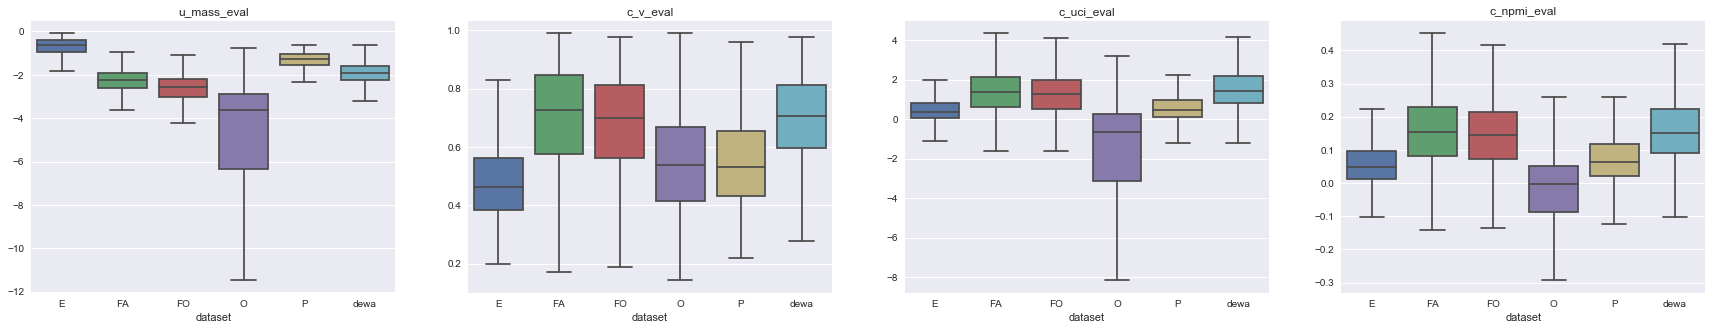

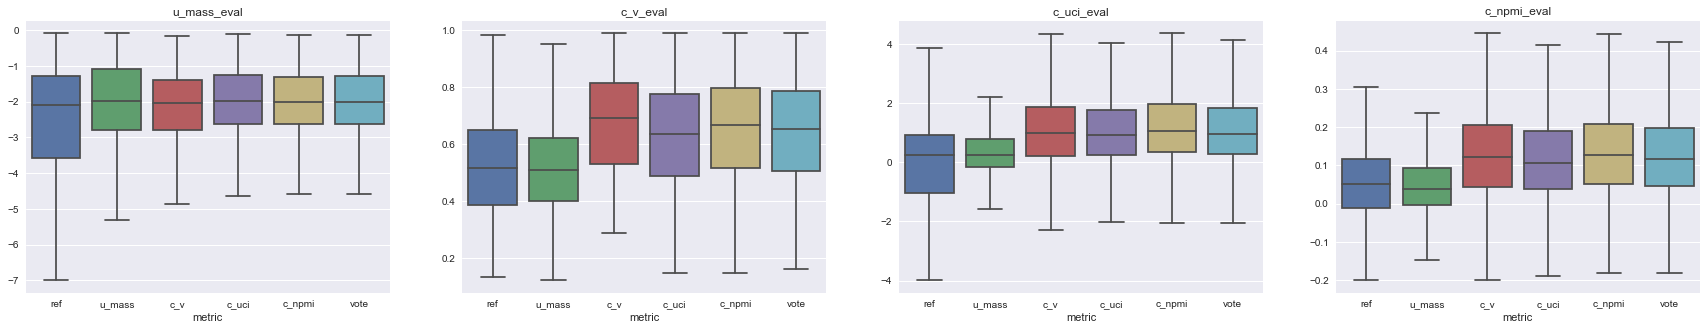

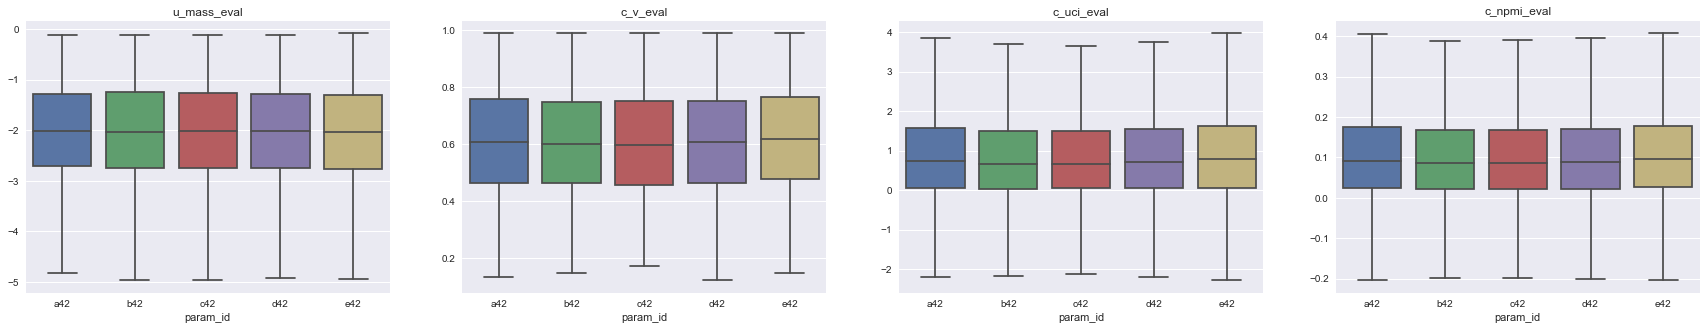

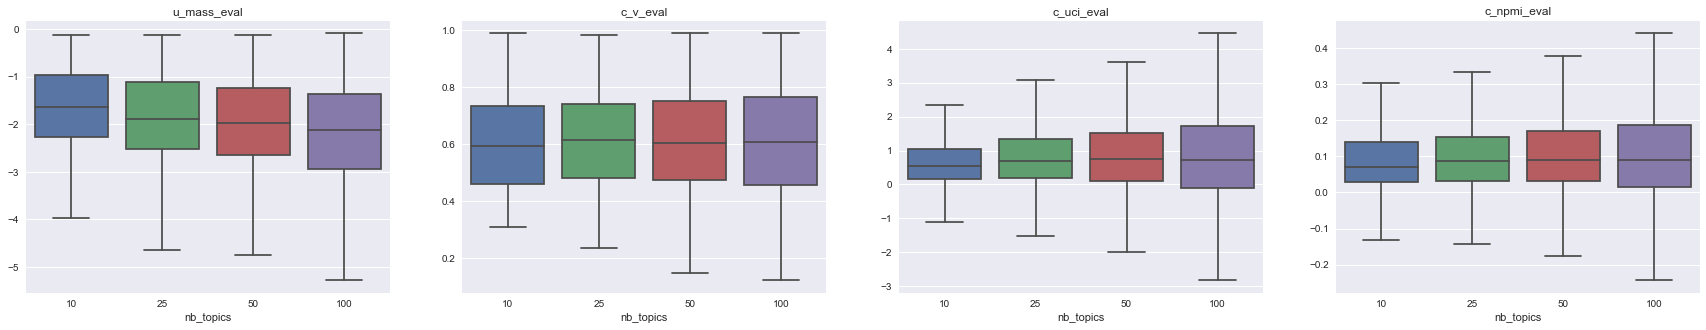

In [88]:
plot(by='dataset')
plot(by='metric')
plot(by='param_id')
plot(by='nb_topics')

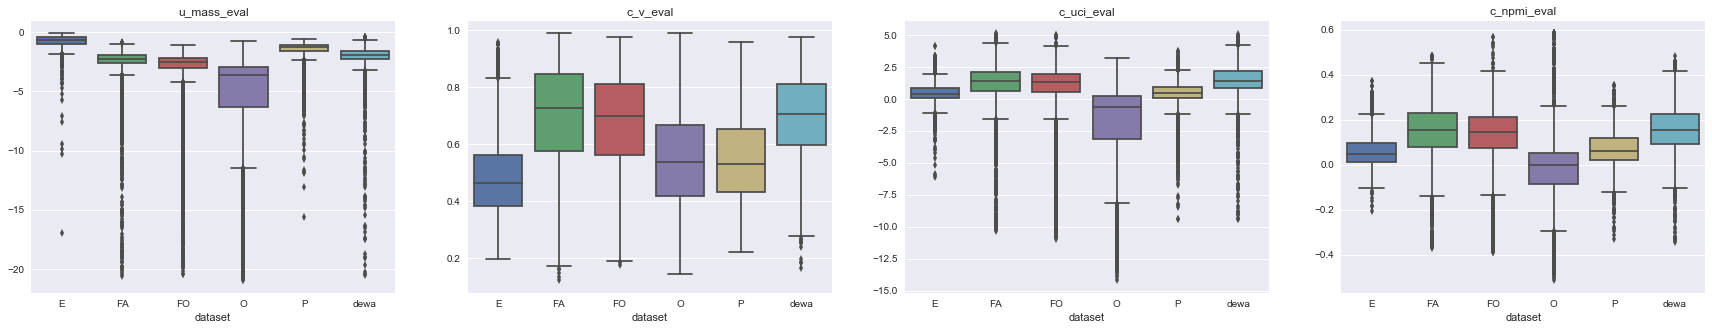

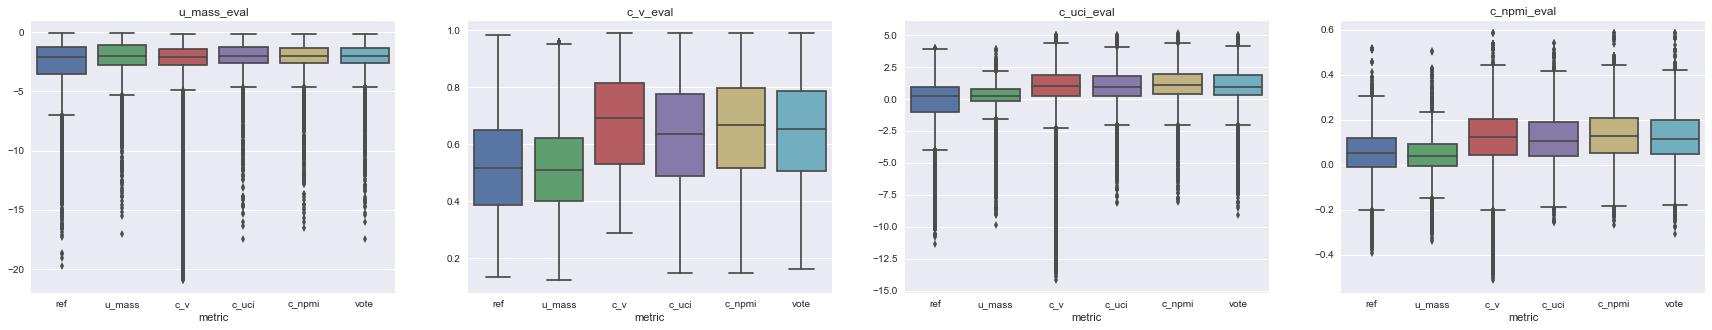

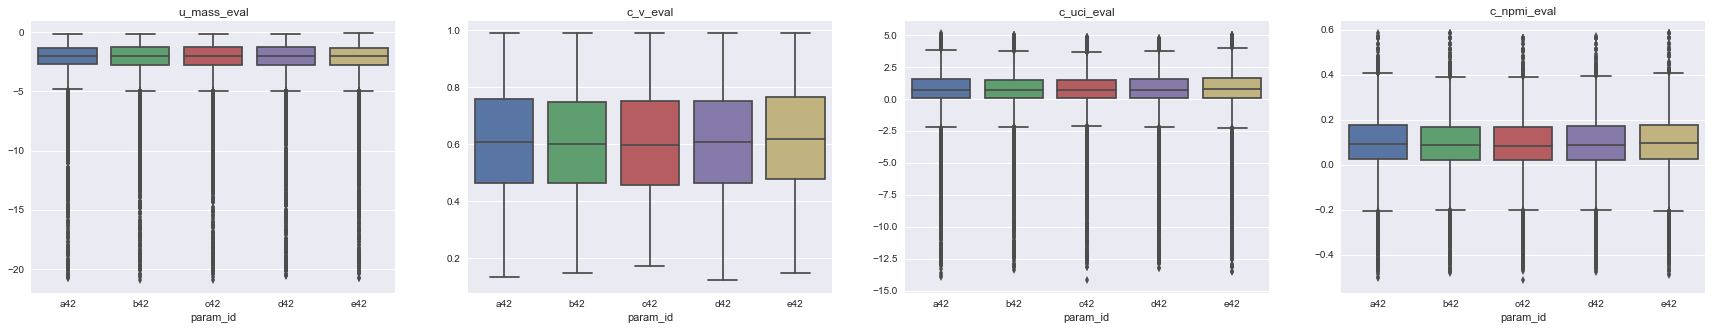

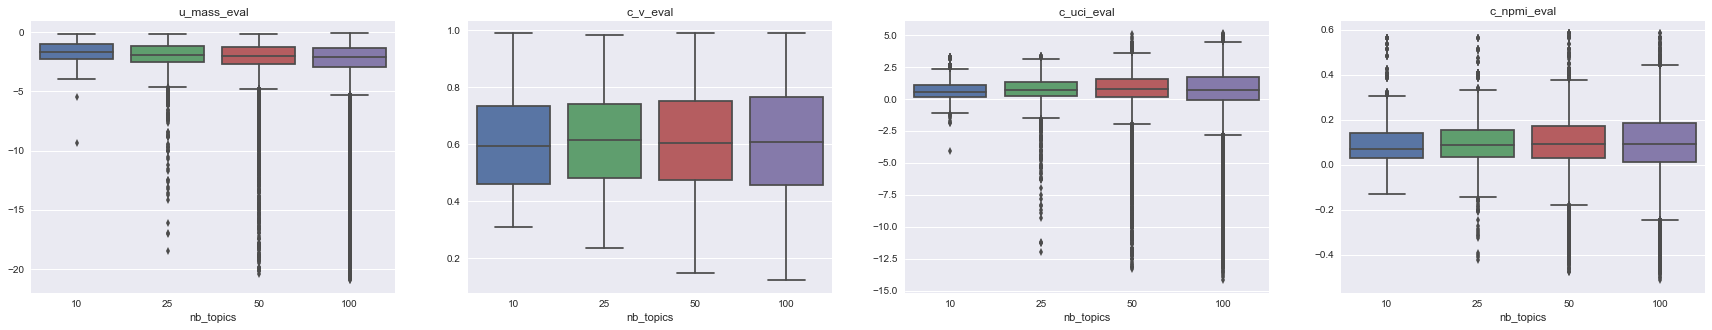

In [89]:
plot(by='dataset', showfliers=True)
plot(by='metric', showfliers=True)
plot(by='param_id', showfliers=True)
plot(by='nb_topics', showfliers=True)

In [190]:
import json
import os
from functools import partial

def load_files(files):
    for file in files:
        with open(file, 'r') as fp:
            js = json.load(fp)
            yield pd.DataFrame(js)
        
directory = join(LDA_PATH, 'topics')
join_dir = partial(join, directory)
json_filter = lambda x: x[-4:] == 'json'
files = map(join_dir, filter(json_filter, os.listdir(directory)))
renamer = {'FAZ_combined': 'FAZ', 'FOCUS_cleansed': 'FOCUS'}
stats = (
    pd.concat([stat for stat in load_files(files)])
    .reset_index(drop=False)
    .rename(columns={'index': 'metric'})
    .replace({'dataset': renamer})
)
stats

metric              dataset  ref   u_mass       c_v    c_uci    c_npmi  \
0   oop_score  OnlineParticipation    0   43.171    45.909   33.707    32.765   
1     runtime  OnlineParticipation    0   38.000   784.000  393.000   849.000   
2   oop_score    PoliticalSpeeches    0   47.275    36.222   38.955    36.275   
3     runtime    PoliticalSpeeches    0  110.000   885.000  413.000   874.000   
4   oop_score                dewac    0   51.602    37.863   37.454    34.384   
5     runtime                dewac    0  228.000  1700.000  545.000  1009.000   
6   oop_score                FOCUS    0   51.905    41.549   38.774    36.339   
7     runtime                FOCUS    0  157.000  1850.000  472.000   931.000   
8   oop_score             Europarl    0   48.763    42.577   42.765    41.671   
9     runtime             Europarl    0  281.000  1244.000  507.000   971.000   
10  oop_score                  FAZ    0   51.142    38.079   38.279    34.901   
11    runtime                  FAZ    0  145.000  1922.000  467.000   925.000   

      vote  nb_topics  nb_candidate_terms  nb_top_terms  size_vocabulary  \
0   26.234        925                  20            10             7138   
1   13.000        925                  20            10             7138   
2   27.263        925                  20            10            22325   
3   12.000        925                  20            10            22325   
4   28.950        925                  20            10           100001   
5   12.000        925                  20            10           100001   
6   30.267        925                  20            10            77443   
7   12.000        925                  20            10            77443   
8   34.265        925                  20            10            50799   
9   13.000        925                  20            10            50799   
10  28.731        925                  20            10            71438   
11  12.000        925                  20            10            71438   

    size_corpus  
0         25664  
1         25664  
2          6038  
3          6038  
4         54814  
5         54814  
6         86159  
7         86159  
8         12751  
9         12751  
10        49759  
11        49759

In [191]:
oop = stats.loc[stats.metric == 'oop_score', :'vote'].set_index('dataset').drop(['ref', 'metric'], axis=1)
oop

u_mass     c_v   c_uci  c_npmi    vote
dataset                                                    
OnlineParticipation  43.171  45.909  33.707  32.765  26.234
PoliticalSpeeches    47.275  36.222  38.955  36.275  27.263
dewac                51.602  37.863  37.454  34.384  28.950
FOCUS                51.905  41.549  38.774  36.339  30.267
Europarl             48.763  42.577  42.765  41.671  34.265
FAZ                  51.142  38.079  38.279  34.901  28.731

In [197]:
runtime = stats.loc[stats.metric == 'runtime', :'vote'].set_index('dataset').drop(['ref', 'metric'], axis=1)
runtime

u_mass     c_v  c_uci  c_npmi  vote
dataset                                                 
OnlineParticipation    38.0   784.0  393.0   849.0  13.0
PoliticalSpeeches     110.0   885.0  413.0   874.0  12.0
dewac                 228.0  1700.0  545.0  1009.0  12.0
FOCUS                 157.0  1850.0  472.0   931.0  12.0
Europarl              281.0  1244.0  507.0   971.0  13.0
FAZ                   145.0  1922.0  467.0   925.0  12.0

[Text(0,0,'OnlineParticipation'),
 Text(0,0,'PoliticalSpeeches'),
 Text(0,0,'dewac'),
 Text(0,0,'FOCUS'),
 Text(0,0,'Europarl'),
 Text(0,0,'FAZ')]

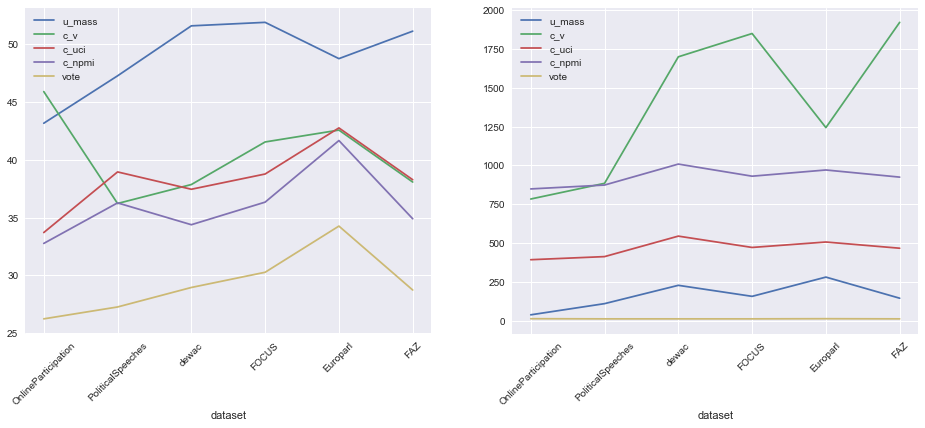

In [202]:
fig, axs = plt.subplots(ncols=2)
oop.plot(ax=axs[0], figsize=(16, 6), xticks=range(len(oop.index)), rot=45).set_xticklabels(oop.index)
runtime.plot(ax=axs[1], xticks=range(len(runtime.index)), rot=45).set_xticklabels(runtime.index)

In [119]:
sample = df.loc[(idx[['O','dewa']], idx[['ref','c_v','c_npmi']], 'e42', 100), :'term9']
sample = sample.groupby(['dataset', 'topic_idx']).apply(lambda x: x.sample(frac=1, random_state=42))
sample.to_csv(join(ETL_PATH, 'LDAmodel', 'topics', 'humanscore_sample_full.csv'))
sample

term0  \
dataset topic_idx dataset metric param_id nb_topics topic_idx                           
O       0         O       c_npmi e42      100       0                          Bürger   
                          c_v    e42      100       0                          Bürger   
                          ref    e42      100       0                          Bürger   
        1         O       c_v    e42      100       1                          Straße   
                          c_npmi e42      100       1                          Straße   
                          ref    e42      100       1                          Straße   
        2         O       c_v    e42      100       2                         Zukunft   
                          c_npmi e42      100       2                     Beleuchtung   
                          ref    e42      100       2                     Beleuchtung   
        3         O       c_v    e42      100       3                   Gesichtspunkt   
                          c_npmi e42      100       3                        Qualität   
                          ref    e42      100       3                        Qualität   
        4         O       c_v    e42      100       4                          Rahmen   
                          ref    e42      100       4                        Festival   
                          c_npmi e42      100       4                         Student   
        5         O       c_v    e42      100       5                          Poller   
                          c_npmi e42      100       5                          Poller   
                          ref    e42      100       5                          Poller   
        6         O       ref    e42      100       6                     Severinsweg   
                          c_v    e42      100       6                      Grünfläche   
                          c_npmi e42      100       6                     Severinsweg   
        7         O       c_v    e42      100       7                          Sperre   
                          ref    e42      100       7                            Auto   
                          c_npmi e42      100       7                            Auto   
        8         O       c_npmi e42      100       8                           Seite   
                          c_v    e42      100       8                   Ausschreibung   
                          ref    e42      100       8                           Seite   
        9         O       c_v    e42      100       9                        Fahrbahn   
                          ref    e42      100       9                        Fahrbahn   
                          c_npmi e42      100       9                        Fahrbahn   
        10        O       c_v    e42      100       10                            Nr.   
                          c_npmi e42      100       10                           Höhe   
                          ref    e42      100       10                           Höhe   
        11        O       c_npmi e42      100       11                      Radfahrer   
                          ref    e42      100       11                      Radfahrer   
                          c_v    e42      100       11                      Radfahrer   
        12        O       ref    e42      100       12                     Verbindung   
                          c_npmi e42      100       12                     Verbindung   
                          c_v    e42      100       12                          Weide   
        13        O       c_v    e42      100       13                           Haus   
                          ref    e42      100       13                           Haus   
                          c_npmi e42      100       13                           Haus   
        14        O       c_v    e42      100       14                        Projekt   
                          c_npmi e42      100       14                     

In [127]:
pseudo = sample.copy()
pseudo.index = pseudo.index.droplevel([2, 3, 4, 5, 6])
pseudo.to_csv(join(ETL_PATH, 'LDAmodel', 'topics', 'humanscore_sample.csv'))
pseudo

term0                   term1  \
dataset topic_idx                                                   
O       0                          Bürger                Bürgerin   
        0                          Bürger                Bürgerin   
        0                          Bürger                Bürgerin   
        1                          Straße                  Gehweg   
        1                          Straße                  Gehweg   
        1                          Straße                  Gehweg   
        2                         Zukunft                  Mensch   
        2                     Beleuchtung                 Zukunft   
        2                     Beleuchtung                 Zukunft   
        3                   Gesichtspunkt           Veranstaltung   
        3                        Qualität           Veranstaltung   
        3                        Qualität           Gesichtspunkt   
        4                          Rahmen                 Projekt   
        4                        Festival          Bürgerhaushalt   
        4                         Student                  Rahmen   
        5                          Poller                    Dame   
        5                          Poller                Fahrgast   
        5                          Poller                    Herr   
        6                     Severinsweg                  Gehweg   
        6                      Grünfläche             Integration   
        6                     Severinsweg                  Gehweg   
        7                          Sperre               Politiker   
        7                            Auto                 Fahrrad   
        7                            Auto                 Fahrrad   
        8                           Seite                Fahrzeug   
        8                   Ausschreibung                  Brücke   
        8                           Seite                Fahrzeug   
        9                        Fahrbahn                  Straße   
        9                        Fahrbahn                  Straße   
        9                        Fahrbahn                  Straße   
        10                            Nr.                   Stein   
        10                           Höhe            Gehwegplatte   
        10                           Höhe            Gehwegplatte   
        11                      Radfahrer               Fußgänger   
        11                      Radfahrer               Fußgänger   
        11                      Radfahrer               Fußgänger   
        12                     Verbindung                  Wupper   
        12                     Verbindung             Gastronomie   
        12                          Weide             Nebenstraße   
        13                           Haus                  Verein   
        13                           Haus                  Verein   
        13                           Haus                  Verein   
        14                        Projekt                    Köln   
        14                        Projekt                    Köln   
        14                        Projekt                    Köln   
        15                          Meter                   Regel   
        15                          Linie              Chorweiler   
        15                          Linie              Chorweiler   
        16                    Möglichkeit              Schwimmbad   
        16                    Möglichkeit              Schwimmbad   
        16                    Möglichkeit              Schwimmbad   
        17                     Moderation                    Gruß   
        17                     Moderation                    Gruß   
        17                     Moderation                    Gruß   
        18                           Bonn                    Oper   
        18                           Bonn                    Oper   
        18                        

In [204]:
sample2 = df.loc[(idx[['O','dewa']], idx[['ref','c_v','c_npmi', 'vote']], 'e42', 100), :'term9']
sample2 = sample2.groupby(['dataset', 'topic_idx']).apply(lambda x: x.sample(frac=1, random_state=42))
sample2.to_csv(join(ETL_PATH, 'LDAmodel', 'topics', 'humanscore_sample2_full.csv'))
sample2

term0  \
dataset topic_idx dataset metric param_id nb_topics topic_idx                           
O       0         O       c_v    e42      100       0                          Bürger   
                          vote   e42      100       0                          Bürger   
                          ref    e42      100       0                          Bürger   
                          c_npmi e42      100       0                          Bürger   
        1         O       c_v    e42      100       1                          Straße   
                          vote   e42      100       1                          Straße   
                          ref    e42      100       1                          Straße   
                          c_npmi e42      100       1                          Straße   
        2         O       c_v    e42      100       2                         Zukunft   
                          vote   e42      100       2                     Beleuchtung   
                          ref    e42      100       2                     Beleuchtung   
                          c_npmi e42      100       2                     Beleuchtung   
        3         O       c_v    e42      100       3                   Gesichtspunkt   
                          vote   e42      100       3                        Qualität   
                          ref    e42      100       3                        Qualität   
                          c_npmi e42      100       3                        Qualität   
        4         O       c_v    e42      100       4                          Rahmen   
                          vote   e42      100       4                         Student   
                          ref    e42      100       4                        Festival   
                          c_npmi e42      100       4                         Student   
        5         O       c_v    e42      100       5                          Poller   
                          vote   e42      100       5                          Poller   
                          ref    e42      100       5                          Poller   
                          c_npmi e42      100       5                          Poller   
        6         O       c_v    e42      100       6                      Grünfläche   
                          vote   e42      100       6                     Severinsweg   
                          ref    e42      100       6                     Severinsweg   
                          c_npmi e42      100       6                     Severinsweg   
        7         O       c_v    e42      100       7                          Sperre   
                          vote   e42      100       7                            Auto   
                          ref    e42      100       7                            Auto   
                          c_npmi e42      100       7                            Auto   
        8         O       c_v    e42      100       8                   Ausschreibung   
                          vote   e42      100       8                           Seite   
                          ref    e42      100       8                           Seite   
                          c_npmi e42      100       8                           Seite   
        9         O       c_v    e42      100       9                        Fahrbahn   
                          vote   e42      100       9                        Fahrbahn   
                          ref    e42      100       9                        Fahrbahn   
                          c_npmi e42      100       9                        Fahrbahn   
        10        O       c_v    e42      100       10                            Nr.   
                          vote   e42      100       10                           Höhe   
                          ref    e42      100       10                           Höhe   
                          c_npmi e42      100       10                     

In [205]:
pseudo2 = sample2.copy()
pseudo2.index = pseudo2.index.droplevel([2, 3, 4, 5, 6])
pseudo2.to_csv(join(ETL_PATH, 'LDAmodel', 'topics', 'humanscore_sample2_pseudo.csv'))
pseudo2

term0                   term1  \
dataset topic_idx                                                   
O       0                          Bürger                Bürgerin   
        0                          Bürger                Bürgerin   
        0                          Bürger                Bürgerin   
        0                          Bürger                Bürgerin   
        1                          Straße                  Gehweg   
        1                          Straße                  Gehweg   
        1                          Straße                  Gehweg   
        1                          Straße                  Gehweg   
        2                         Zukunft                  Mensch   
        2                     Beleuchtung                 Zukunft   
        2                     Beleuchtung                 Zukunft   
        2                     Beleuchtung                 Zukunft   
        3                   Gesichtspunkt           Veranstaltung   
        3                        Qualität           Veranstaltung   
        3                        Qualität           Gesichtspunkt   
        3                        Qualität           Veranstaltung   
        4                          Rahmen                 Projekt   
        4                         Student                  Rahmen   
        4                        Festival          Bürgerhaushalt   
        4                         Student                  Rahmen   
        5                          Poller                    Dame   
        5                          Poller                Fahrgast   
        5                          Poller                    Herr   
        5                          Poller                Fahrgast   
        6                      Grünfläche             Integration   
        6                     Severinsweg                  Gehweg   
        6                     Severinsweg                  Gehweg   
        6                     Severinsweg                  Gehweg   
        7                          Sperre               Politiker   
        7                            Auto                 Fahrrad   
        7                            Auto                 Fahrrad   
        7                            Auto                 Fahrrad   
        8                   Ausschreibung                  Brücke   
        8                           Seite                Fahrzeug   
        8                           Seite                Fahrzeug   
        8                           Seite                Fahrzeug   
        9                        Fahrbahn                  Straße   
        9                        Fahrbahn                  Straße   
        9                        Fahrbahn                  Straße   
        9                        Fahrbahn                  Straße   
        10                            Nr.                   Stein   
        10                           Höhe            Gehwegplatte   
        10                           Höhe            Gehwegplatte   
        10                           Höhe            Gehwegplatte   
        11                      Radfahrer               Fußgänger   
        11                      Radfahrer               Fußgänger   
        11                      Radfahrer               Fußgänger   
        11                      Radfahrer               Fußgänger   
        12                          Weide             Nebenstraße   
        12                     Verbindung             Gastronomie   
        12                     Verbindung                  Wupper   
        12                     Verbindung             Gastronomie   
        13                           Haus                  Verein   
        13                           Haus                  Verein   
        13                           Haus                  Verein   
        13                           Haus                  Verein   
        14                        

In [206]:
anno1 = pd.read_csv(join(ETL_PATH, 'LDAmodel', 'topics', 'humanscore_sample_annotiert.csv'))
anno2 = pd.read_csv(join(ETL_PATH, 'LDAmodel', 'topics', 'humanscore_sample2_pseudo_annotiert.csv'))

In [214]:
anno1

dataset  topic_idx                   term0                   term1  \
0         O          0                  Bürger                Bürgerin   
1         O          0                  Bürger                Bürgerin   
2         O          0                  Bürger                Bürgerin   
3         O          1                  Straße                  Gehweg   
4         O          1                  Straße                  Gehweg   
5         O          1                  Straße                  Gehweg   
6         O          2                 Zukunft                  Mensch   
7         O          2             Beleuchtung                 Zukunft   
8         O          2             Beleuchtung                 Zukunft   
9         O          3           Gesichtspunkt           Veranstaltung   
10        O          3                Qualität           Veranstaltung   
11        O          3                Qualität           Gesichtspunkt   
12        O          4                  Rahmen                 Projekt   
13        O          4                Festival          Bürgerhaushalt   
14        O          4                 Student                  Rahmen   
15        O          5                  Poller                    Dame   
16        O          5                  Poller                Fahrgast   
17        O          5                  Poller                    Herr   
18        O          6             Severinsweg                  Gehweg   
19        O          6              Grünfläche             Integration   
20        O          6             Severinsweg                  Gehweg   
21        O          7                  Sperre               Politiker   
22        O          7                    Auto                 Fahrrad   
23        O          7                    Auto                 Fahrrad   
24        O          8                   Seite                Fahrzeug   
25        O          8           Ausschreibung                  Brücke   
26        O          8                   Seite                Fahrzeug   
27        O          9                Fahrbahn                  Straße   
28        O          9                Fahrbahn                  Straße   
29        O          9                Fahrbahn                  Straße   
30        O         10                     Nr.                   Stein   
31        O         10                    Höhe            Gehwegplatte   
32        O         10                    Höhe            Gehwegplatte   
33        O         11               Radfahrer               Fußgänger   
34        O         11               Radfahrer               Fußgänger   
35        O         11               Radfahrer               Fußgänger   
36        O         12              Verbindung                  Wupper   
37        O         12              Verbindung             Gastronomie   
38        O         12                   Weide             Nebenstraße   
39        O         13                    Haus                  Verein   
40        O         13                    Haus                  Verein   
41        O         13                    Haus                  Verein   
42        O         14                 Projekt                    Köln   
43        O         14                 Projekt                    Köln   
44        O         14                 Projekt                    Köln   
45        O         15                   Meter                   Regel   
46        O         15                   Linie              Chorweiler   
47        O         15                   Linie              Chorweiler   
48        O         16             Möglichkeit              Schwimmbad   
49        O         16             Möglichkeit              Schwimmbad   
50        O         16             Möglichkeit              Schwimmbad   
51        O         17              Moderation                    Gruß   
52        O         17              Moderation                    Gruß   
53      

In [222]:
s = sample
s

term0  \
dataset topic_idx dataset metric param_id nb_topics topic_idx                           
O       0         O       c_npmi e42      100       0                          Bürger   
                          c_v    e42      100       0                          Bürger   
                          ref    e42      100       0                          Bürger   
        1         O       c_v    e42      100       1                          Straße   
                          c_npmi e42      100       1                          Straße   
                          ref    e42      100       1                          Straße   
        2         O       c_v    e42      100       2                         Zukunft   
                          c_npmi e42      100       2                     Beleuchtung   
                          ref    e42      100       2                     Beleuchtung   
        3         O       c_v    e42      100       3                   Gesichtspunkt   
                          c_npmi e42      100       3                        Qualität   
                          ref    e42      100       3                        Qualität   
        4         O       c_v    e42      100       4                          Rahmen   
                          ref    e42      100       4                        Festival   
                          c_npmi e42      100       4                         Student   
        5         O       c_v    e42      100       5                          Poller   
                          c_npmi e42      100       5                          Poller   
                          ref    e42      100       5                          Poller   
        6         O       ref    e42      100       6                     Severinsweg   
                          c_v    e42      100       6                      Grünfläche   
                          c_npmi e42      100       6                     Severinsweg   
        7         O       c_v    e42      100       7                          Sperre   
                          ref    e42      100       7                            Auto   
                          c_npmi e42      100       7                            Auto   
        8         O       c_npmi e42      100       8                           Seite   
                          c_v    e42      100       8                   Ausschreibung   
                          ref    e42      100       8                           Seite   
        9         O       c_v    e42      100       9                        Fahrbahn   
                          ref    e42      100       9                        Fahrbahn   
                          c_npmi e42      100       9                        Fahrbahn   
        10        O       c_v    e42      100       10                            Nr.   
                          c_npmi e42      100       10                           Höhe   
                          ref    e42      100       10                           Höhe   
        11        O       c_npmi e42      100       11                      Radfahrer   
                          ref    e42      100       11                      Radfahrer   
                          c_v    e42      100       11                      Radfahrer   
        12        O       ref    e42      100       12                     Verbindung   
                          c_npmi e42      100       12                     Verbindung   
                          c_v    e42      100       12                          Weide   
        13        O       c_v    e42      100       13                           Haus   
                          ref    e42      100       13                           Haus   
                          c_npmi e42      100       13                           Haus   
        14        O       c_v    e42      100       14                        Projekt   
                          c_npmi e42      100       14                     

In [232]:
s = s.reset_index(drop=False)
s['Bewertung'] = anno1.Bewertung.copy()

In [233]:
s

dataset  metric  topic_idx                   term0  \
0         O  c_npmi          0                  Bürger   
1         O     c_v          0                  Bürger   
2         O     ref          0                  Bürger   
3         O     c_v          1                  Straße   
4         O  c_npmi          1                  Straße   
5         O     ref          1                  Straße   
6         O     c_v          2                 Zukunft   
7         O  c_npmi          2             Beleuchtung   
8         O     ref          2             Beleuchtung   
9         O     c_v          3           Gesichtspunkt   
10        O  c_npmi          3                Qualität   
11        O     ref          3                Qualität   
12        O     c_v          4                  Rahmen   
13        O     ref          4                Festival   
14        O  c_npmi          4                 Student   
15        O     c_v          5                  Poller   
16        O  c_npmi          5                  Poller   
17        O     ref          5                  Poller   
18        O     ref          6             Severinsweg   
19        O     c_v          6              Grünfläche   
20        O  c_npmi          6             Severinsweg   
21        O     c_v          7                  Sperre   
22        O     ref          7                    Auto   
23        O  c_npmi          7                    Auto   
24        O  c_npmi          8                   Seite   
25        O     c_v          8           Ausschreibung   
26        O     ref          8                   Seite   
27        O     c_v          9                Fahrbahn   
28        O     ref          9                Fahrbahn   
29        O  c_npmi          9                Fahrbahn   
30        O     c_v         10                     Nr.   
31        O  c_npmi         10                    Höhe   
32        O     ref         10                    Höhe   
33        O  c_npmi         11               Radfahrer   
34        O     ref         11               Radfahrer   
35        O     c_v         11               Radfahrer   
36        O     ref         12              Verbindung   
37        O  c_npmi         12              Verbindung   
38        O     c_v         12                   Weide   
39        O     c_v         13                    Haus   
40        O     ref         13                    Haus   
41        O  c_npmi         13                    Haus   
42        O     c_v         14                 Projekt   
43        O  c_npmi         14                 Projekt   
44        O     ref         14                 Projekt   
45        O     ref         15                   Meter   
46        O     c_v         15                   Linie   
47        O  c_npmi         15                   Linie   
48        O     ref         16             Möglichkeit   
49        O  c_npmi         16             Möglichkeit   
50        O     c_v         16             Möglichkeit   
51        O     c_v         17              Moderation   
52        O     ref         17              Moderation   
53        O  c_npmi         17              Moderation   
54        O  c_npmi         18                    Bonn   
55        O     ref         18                    Bonn   
56        O     c_v         18                    Bonn   
57        O  c_npmi         19           Hundebesitzer   
58        O     ref         19           Hundebesitzer   
59        O     c_v         19              Wohngebiet   
60        O     ref         20                   Farbe   
61        O     c_v         20              Autofahrer   
62        O  c_npmi         20                   Farbe   
63        O  c_npmi         21                  Radweg   
64        O     c_v         21                  Radweg   
65        O     ref         21                  Radweg   
66        O     ref         22                    Euro   
67        O  c_npmi         22                    Kind   
68

In [269]:
#s = s.dropna()
#s = s.iloc[:, [0, 1, 2, -1]]
#s = s.set_index('topic_idx')
#o = s[s.dataset == 'O'].drop('dataset', axis=1)
#d = s[s.dataset == 'dewa'].drop('dataset', axis=1)
#o = o.sort_values('metric').sort_index(kind='mergesort')
#d = d.sort_values('metric').sort_index(kind='mergesort')
#o = o.sort_values('metric', kind='mergesort').set_index('metric', append=True).unstack('metric')
#o.columns = o.columns.droplevel(0)
o.describe()

metric  c_npmi     c_v     ref
count   11.000  11.000  11.000
mean     7.364   6.636   6.636
std      2.014   2.335   1.748
min      4.000   3.000   4.000
25%      6.500   5.000   5.500
50%      8.000   6.000   7.000
75%      9.000   9.000   7.000
max     10.000  10.000  10.000

In [271]:
#d = s[s.dataset == 'dewa'].drop('dataset', axis=1)
#d = d.sort_values('metric').sort_index(kind='mergesort')
#d = d.sort_values('metric', kind='mergesort').set_index('metric', append=True).unstack('metric')
#d.columns = d.columns.droplevel(0)
d.describe()

metric  c_npmi     c_v     ref
count   13.000  13.000  13.000
mean     8.846   9.077   8.231
std      0.689   0.954   1.092
min      8.000   7.000   7.000
25%      8.000   9.000   7.000
50%      9.000   9.000   8.000
75%      9.000  10.000   9.000
max     10.000  10.000  10.000

In [297]:
s2 = sample2.copy()
s2.index = s2.index.droplevel([0, 1])
s2 = (
    s2
    .reset_index(drop=False)
    .assign(Bewertung=anno2.Bewertung.copy())
    .dropna()
    .iloc[:, [0, 1, 4, -1]]
    .set_index('topic_idx')
)
s2

dataset  metric  Bewertung
topic_idx                           
94           dewa     c_v        9.0
94           dewa    vote        9.0
94           dewa     ref        6.0
94           dewa  c_npmi        9.0
95           dewa     c_v        9.0
95           dewa    vote        8.0
95           dewa     ref        9.0
95           dewa  c_npmi        8.0
96           dewa     c_v        9.0
96           dewa    vote        9.0
96           dewa     ref        8.0
96           dewa  c_npmi        9.0
97           dewa     c_v       10.0
97           dewa    vote        9.0
97           dewa     ref        8.0
97           dewa  c_npmi        8.0
98           dewa     c_v        8.0
98           dewa    vote        8.0
98           dewa     ref        5.0
98           dewa  c_npmi        8.0
99           dewa     c_v        8.0
99           dewa    vote        6.0
99           dewa     ref        4.0
99           dewa  c_npmi        7.0

In [298]:
o2 = (
    s2
    .query('dataset == "O"')
    .drop('dataset', axis=1)
    .sort_values('metric')
    .sort_index(kind='mergesort')
    .sort_values('metric', kind='mergesort')
    .set_index('metric', append=True)
    .unstack('metric')
    .dropna(how='any')
)
o2.columns = o2.columns.droplevel(0)
o2

Empty DataFrame
Columns: []
Index: []

In [300]:
d2 = (
    s2
    .query('dataset == "dewa"')
    .drop('dataset', axis=1)
    .sort_values('metric')
    .sort_index(kind='mergesort')
    .sort_values('metric', kind='mergesort')
    .set_index('metric', append=True)
    .unstack('metric')
)
d2.columns = d2.columns.droplevel(0)
d2

metric     c_npmi   c_v  ref  vote
topic_idx                         
94            9.0   9.0  6.0   9.0
95            8.0   9.0  9.0   8.0
96            9.0   9.0  8.0   9.0
97            8.0  10.0  8.0   9.0
98            8.0   8.0  5.0   8.0
99            7.0   8.0  4.0   6.0

In [301]:
d2.describe()

metric  c_npmi     c_v    ref   vote
count    6.000   6.000  6.000  6.000
mean     8.167   8.833  6.667  8.167
std      0.753   0.753  1.966  1.169
min      7.000   8.000  4.000  6.000
25%      8.000   8.250  5.250  8.000
50%      8.000   9.000  7.000  8.500
75%      8.750   9.000  8.000  9.000
max      9.000  10.000  9.000  9.000

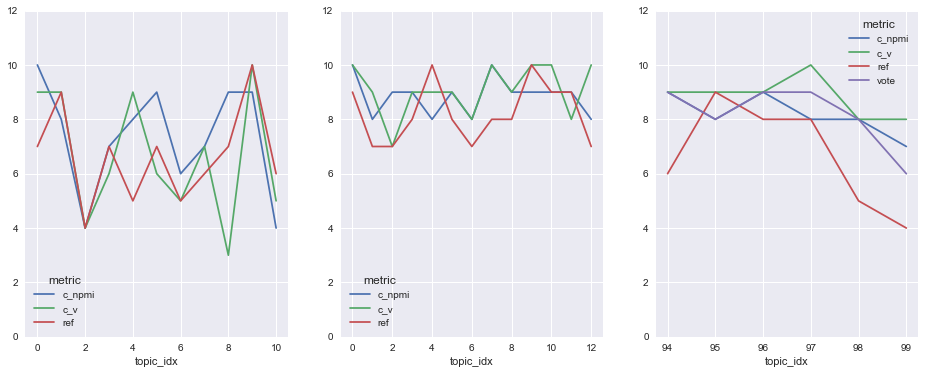

In [304]:
fig, axs = subplots(ncols=3)
o.plot(ax=axs[0], ylim=(0,12), figsize=(16,6))
d.plot(ax=axs[1], ylim=(0,12))
d2.plot(ax=axs[2], ylim=(0,12))